In [27]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import pandas as pd
from keras import layers

In [13]:
data = pd.read_csv('all_stocks_5yr.csv')
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


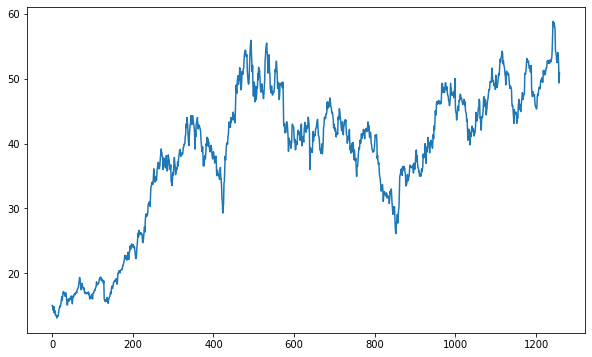

In [19]:
AAL = data[data['Name'] == 'AAL']
plt.figure(figsize=(10, 6))
plt.plot(AAL['open'])

In [3]:
def window_dataset(series, window_size, batch_size = 32, shuffle_buffer = 1000):
    dataset = tf.data.Dataset.from_tensor_slices(series) # Create time series step
    dataset = dataset.window(window_size + 1, shift = 1, drop_remainder= True) # divide a data into sub-data based on window size
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1)) # turn list data into tensor
    dataset = dataset.shuffle(shuffle_buffer) # shuffle data
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))  # use a next value as a target value
    dataset = dataset.batch(batch_size).prefetch(1) # batch window data
    return dataset

In [39]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift = 1, drop_remainder = True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [40]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

In [28]:
open_price = AAL['open']
split_time = 855
time = np.arange(len(open_price))
x_train = open_price[:split_time]
time_train = time[:split_time]

x_valid = open_price[split_time:]
time_valid = time[split_time:]

In [30]:
tf.random.set_seed(1)
np.random.seed(1)

window_size = 30
train_set = window_dataset(x_train, window_size)
valid_set = window_dataset(x_valid, window_size)

model = keras.models.Sequential()
model.add(layers.Dense(1, input_shape = [window_size]))

optimizer = keras.optimizers.SGD(lr = 1e-5, momentum = 0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
early_stopping = keras.callbacks.EarlyStopping(patience=10)
model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping])

Epoch 1/500
26/26 [==============================] - 1s 18ms/step - loss: 43.0004 - mae: 43.4997 - val_loss: 9.0125 - val_mae: 9.5125
Epoch 2/500
26/26 [==============================] - 0s 6ms/step - loss: 6.5912 - mae: 7.0809 - val_loss: 2.9343 - val_mae: 3.3995
Epoch 3/500
26/26 [==============================] - 0s 9ms/step - loss: 2.6404 - mae: 3.0997 - val_loss: 1.9699 - val_mae: 2.4260
Epoch 4/500
26/26 [==============================] - 0s 6ms/step - loss: 2.0646 - mae: 2.5259 - val_loss: 2.1876 - val_mae: 2.6510
Epoch 5/500
26/26 [==============================] - 0s 6ms/step - loss: 2.0216 - mae: 2.4756 - val_loss: 1.9649 - val_mae: 2.4249
Epoch 6/500
26/26 [==============================] - 0s 7ms/step - loss: 2.0881 - mae: 2.5463 - val_loss: 1.8708 - val_mae: 2.3311
Epoch 7/500
26/26 [==============================] - 0s 7ms/step - loss: 2.0042 - mae: 2.4711 - val_loss: 1.8890 - val_mae: 2.3447
Epoch 8/500
26/26 [==============================] - 0s 6ms/step - loss: 1.9158 

26/26 [==============================] - 0s 6ms/step - loss: 1.0105 - mae: 1.4234 - val_loss: 0.9184 - val_mae: 1.3414
Epoch 64/500
26/26 [==============================] - 0s 6ms/step - loss: 1.0014 - mae: 1.4103 - val_loss: 0.9250 - val_mae: 1.3445
Epoch 65/500
26/26 [==============================] - 0s 6ms/step - loss: 0.9715 - mae: 1.3869 - val_loss: 0.9291 - val_mae: 1.3507
Epoch 66/500
26/26 [==============================] - 0s 8ms/step - loss: 0.9142 - mae: 1.3261 - val_loss: 0.9072 - val_mae: 1.3286
Epoch 67/500
26/26 [==============================] - 0s 6ms/step - loss: 0.9747 - mae: 1.3854 - val_loss: 1.0585 - val_mae: 1.4872
Epoch 68/500
26/26 [==============================] - 0s 6ms/step - loss: 1.0448 - mae: 1.4586 - val_loss: 0.9509 - val_mae: 1.3694
Epoch 69/500
26/26 [==============================] - 0s 6ms/step - loss: 1.0298 - mae: 1.4442 - val_loss: 0.9513 - val_mae: 1.3702
Epoch 70/500
26/26 [==============================] - 0s 6ms/step - loss: 1.0153 - mae: 1

Epoch 125/500
26/26 [==============================] - 0s 6ms/step - loss: 0.7893 - mae: 1.1850 - val_loss: 0.7365 - val_mae: 1.1364
Epoch 126/500
26/26 [==============================] - 0s 7ms/step - loss: 0.7954 - mae: 1.2010 - val_loss: 0.7255 - val_mae: 1.1244
Epoch 127/500
26/26 [==============================] - 0s 9ms/step - loss: 0.7878 - mae: 1.1864 - val_loss: 0.7465 - val_mae: 1.1493
Epoch 128/500
26/26 [==============================] - 0s 7ms/step - loss: 0.7827 - mae: 1.1736 - val_loss: 0.7261 - val_mae: 1.1259
Epoch 129/500
26/26 [==============================] - 0s 8ms/step - loss: 0.7818 - mae: 1.1826 - val_loss: 0.8342 - val_mae: 1.2520
Epoch 130/500
26/26 [==============================] - 0s 6ms/step - loss: 0.8346 - mae: 1.2429 - val_loss: 0.7644 - val_mae: 1.1700
Epoch 131/500
26/26 [==============================] - 0s 7ms/step - loss: 0.7685 - mae: 1.1632 - val_loss: 0.7320 - val_mae: 1.1326
Epoch 132/500
26/26 [==============================] - 0s 7ms/step - 

26/26 [==============================] - 0s 6ms/step - loss: 0.6981 - mae: 1.0829 - val_loss: 0.6938 - val_mae: 1.0983
Epoch 187/500
26/26 [==============================] - 0s 6ms/step - loss: 0.6586 - mae: 1.0450 - val_loss: 0.6283 - val_mae: 1.0188
Epoch 188/500
26/26 [==============================] - 0s 6ms/step - loss: 0.6755 - mae: 1.0601 - val_loss: 0.8039 - val_mae: 1.2216
Epoch 189/500
26/26 [==============================] - 0s 6ms/step - loss: 0.7288 - mae: 1.1286 - val_loss: 0.6143 - val_mae: 1.0030
Epoch 190/500
26/26 [==============================] - 0s 6ms/step - loss: 0.6725 - mae: 1.0687 - val_loss: 0.6444 - val_mae: 1.0388
Epoch 191/500
26/26 [==============================] - 0s 6ms/step - loss: 0.6950 - mae: 1.0832 - val_loss: 1.0099 - val_mae: 1.4500
Epoch 192/500
26/26 [==============================] - 0s 6ms/step - loss: 0.7326 - mae: 1.1306 - val_loss: 0.6512 - val_mae: 1.0464
Epoch 193/500
26/26 [==============================] - 0s 6ms/step - loss: 0.6272 -

In [37]:
lin_forecast = model_forecast(model, open_price[split_time - window_size:-1], window_size)[:, 0]
lin_forecast.shape

(404,)

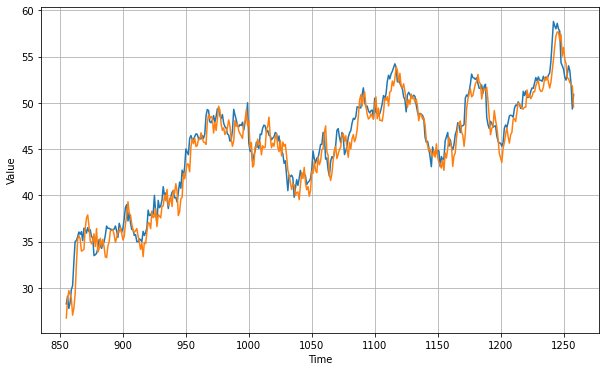

In [41]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, lin_forecast)

In [43]:
keras.metrics.mean_absolute_error(x_valid, lin_forecast).numpy()

1.0917908

In [44]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(x_train, window_size)

model = keras.models.Sequential([
  keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
  keras.layers.Dense(10, activation="relu"),
  keras.layers.Dense(1)
])

lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-7 * 10**(epoch / 20))
optimizer = keras.optimizers.SGD(lr=1e-7, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
26/26 [==============================] - 1s 2ms/step - loss: 37.1725 - mae: 37.6725
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 35.1924 - mae: 35.6924
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 33.6798 - mae: 34.1798
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 31.4633 - mae: 31.9633
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 29.5133 - mae: 30.0133
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 26.9663 - mae: 27.4663
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: 23.6481 - mae: 24.1481
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 20.9413 - mae: 21.4413
Epoch 9/100
26/26 [==============================] - 0s 1ms/step - loss: 17.5650 - mae: 18.0650
Epoch 10/100
26/26 [==============================] - 0s 3ms/step - loss: 13.6379 - mae: 14.1379
Epoch 11/100
26/26 [===================

26/26 [==============================] - 0s 2ms/step - loss: 34.0652 - mae: 34.5652
Epoch 88/100
26/26 [==============================] - 0s 2ms/step - loss: 32.8558 - mae: 33.3558
Epoch 89/100
26/26 [==============================] - 0s 2ms/step - loss: 32.5732 - mae: 33.0732
Epoch 90/100
26/26 [==============================] - 0s 2ms/step - loss: 31.9974 - mae: 32.4974
Epoch 91/100
26/26 [==============================] - 0s 2ms/step - loss: 31.6787 - mae: 32.1787
Epoch 92/100
26/26 [==============================] - 0s 2ms/step - loss: 30.1830 - mae: 30.6830
Epoch 93/100
26/26 [==============================] - 0s 2ms/step - loss: 27.4456 - mae: 27.9456
Epoch 94/100
26/26 [==============================] - 0s 2ms/step - loss: 19.6862 - mae: 20.1816
Epoch 95/100
26/26 [==============================] - 0s 2ms/step - loss: 8.5046 - mae: 8.9862
Epoch 96/100
26/26 [==============================] - 0s 1ms/step - loss: 8.0388 - mae: 8.5259
Epoch 97/100
26/26 [===========================

(1e-07, 0.005, 0.0, 30.0)

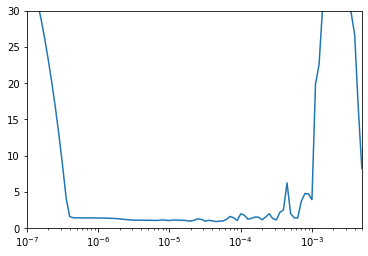

In [46]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-7, 5e-3, 0, 30])

In [47]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(x_train, window_size)
valid_set = window_dataset(x_valid, window_size)

model = keras.models.Sequential([
  keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
  keras.layers.Dense(10, activation="relu"),
  keras.layers.Dense(1)
])

optimizer = keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
early_stopping = keras.callbacks.EarlyStopping(patience=10)
model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping])

Epoch 1/500
26/26 [==============================] - 1s 14ms/step - loss: 24.8865 - mae: 25.3851 - val_loss: 6.3275 - val_mae: 6.8274
Epoch 2/500
26/26 [==============================] - 0s 7ms/step - loss: 3.9016 - mae: 4.3793 - val_loss: 1.9190 - val_mae: 2.3748
Epoch 3/500
26/26 [==============================] - 0s 8ms/step - loss: 1.9492 - mae: 2.4150 - val_loss: 1.7167 - val_mae: 2.1646
Epoch 4/500
26/26 [==============================] - 0s 7ms/step - loss: 1.8443 - mae: 2.2948 - val_loss: 1.7394 - val_mae: 2.1925
Epoch 5/500
26/26 [==============================] - 0s 6ms/step - loss: 1.7187 - mae: 2.1680 - val_loss: 2.0266 - val_mae: 2.4915
Epoch 6/500
26/26 [==============================] - 0s 6ms/step - loss: 1.6102 - mae: 2.0633 - val_loss: 1.7483 - val_mae: 2.2086
Epoch 7/500
26/26 [==============================] - 0s 7ms/step - loss: 1.6195 - mae: 2.0706 - val_loss: 1.7365 - val_mae: 2.1956
Epoch 8/500
26/26 [==============================] - 0s 6ms/step - loss: 1.6733 

26/26 [==============================] - 0s 6ms/step - loss: 0.8179 - mae: 1.2263 - val_loss: 0.7438 - val_mae: 1.1530
Epoch 64/500
26/26 [==============================] - 0s 6ms/step - loss: 0.7399 - mae: 1.1392 - val_loss: 0.7605 - val_mae: 1.1697
Epoch 65/500
26/26 [==============================] - 0s 6ms/step - loss: 0.7394 - mae: 1.1396 - val_loss: 0.7329 - val_mae: 1.1404
Epoch 66/500
26/26 [==============================] - 0s 6ms/step - loss: 0.7415 - mae: 1.1404 - val_loss: 0.7120 - val_mae: 1.1202
Epoch 67/500
26/26 [==============================] - 0s 6ms/step - loss: 0.6966 - mae: 1.0882 - val_loss: 0.7088 - val_mae: 1.1157
Epoch 68/500
26/26 [==============================] - 0s 6ms/step - loss: 0.6790 - mae: 1.0629 - val_loss: 0.7083 - val_mae: 1.1142
Epoch 69/500
26/26 [==============================] - 0s 6ms/step - loss: 0.7020 - mae: 1.0949 - val_loss: 0.7067 - val_mae: 1.1125
Epoch 70/500
26/26 [==============================] - 0s 6ms/step - loss: 0.7083 - mae: 1

Epoch 125/500
26/26 [==============================] - 0s 9ms/step - loss: 0.5792 - mae: 0.9470 - val_loss: 0.5854 - val_mae: 0.9657
Epoch 126/500
26/26 [==============================] - 0s 8ms/step - loss: 0.6180 - mae: 0.9995 - val_loss: 0.5858 - val_mae: 0.9663
Epoch 127/500
26/26 [==============================] - 0s 7ms/step - loss: 0.6173 - mae: 0.9931 - val_loss: 0.5818 - val_mae: 0.9612
Epoch 128/500
26/26 [==============================] - 0s 6ms/step - loss: 0.6228 - mae: 0.9986 - val_loss: 0.6032 - val_mae: 0.9947
Epoch 129/500
26/26 [==============================] - 0s 8ms/step - loss: 0.6116 - mae: 0.9874 - val_loss: 0.6438 - val_mae: 1.0476
Epoch 130/500
26/26 [==============================] - 0s 6ms/step - loss: 0.5758 - mae: 0.9491 - val_loss: 0.5795 - val_mae: 0.9589
Epoch 131/500
26/26 [==============================] - 0s 7ms/step - loss: 0.5705 - mae: 0.9475 - val_loss: 0.6159 - val_mae: 1.0132
Epoch 132/500
26/26 [==============================] - 0s 6ms/step - 

In [49]:
dense_forecast = model_forecast(
    model,
    open_price[split_time - window_size:-1],
    window_size)[:, 0]

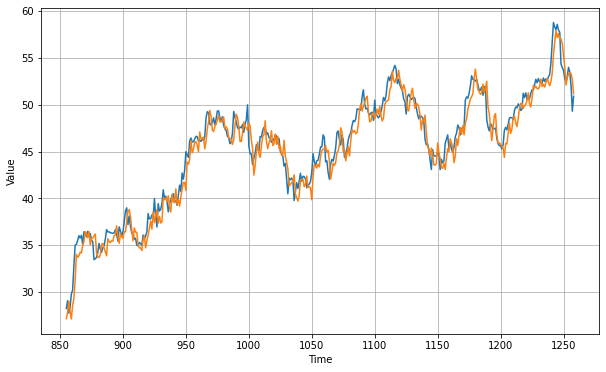

In [50]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, dense_forecast)

In [51]:
keras.metrics.mean_absolute_error(x_valid, dense_forecast).numpy()

1.0346932

Simple RNN model

In [52]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(x_train, window_size, batch_size=128)

model = keras.models.Sequential([
  keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  keras.layers.SimpleRNN(100, return_sequences=True),
  keras.layers.SimpleRNN(100),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200.0)
])
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-7 * 10**(epoch / 20))
optimizer = keras.optimizers.SGD(lr=1e-7, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
7/7 [==============================] - 3s 36ms/step - loss: 54.7579 - mae: 55.2577
Epoch 2/100
7/7 [==============================] - 0s 31ms/step - loss: 13.3081 - mae: 13.7979
Epoch 3/100
7/7 [==============================] - 0s 31ms/step - loss: 14.4964 - mae: 14.9897
Epoch 4/100
7/7 [==============================] - 0s 31ms/step - loss: 10.6283 - mae: 11.1232
Epoch 5/100
7/7 [==============================] - 0s 34ms/step - loss: 5.8648 - mae: 6.3525
Epoch 6/100
7/7 [==============================] - 0s 31ms/step - loss: 4.0534 - mae: 4.5346
Epoch 7/100
7/7 [==============================] - 0s 34ms/step - loss: 2.9671 - mae: 3.4255
Epoch 8/100
7/7 [==============================] - 0s 36ms/step - loss: 2.5477 - mae: 3.0072
Epoch 9/100
7/7 [==============================] - 0s 31ms/step - loss: 2.4174 - mae: 2.8731
Epoch 10/100
7/7 [==============================] - 0s 31ms/step - loss: 1.9126 - mae: 2.3516
Epoch 11/100
7/7 [==============================] - 0s 29ms/s

Epoch 86/100
7/7 [==============================] - 0s 29ms/step - loss: 8156.2294 - mae: 8156.7294
Epoch 87/100
7/7 [==============================] - 0s 29ms/step - loss: 6946.5372 - mae: 6947.0372
Epoch 88/100
7/7 [==============================] - 0s 29ms/step - loss: 10378.3789 - mae: 10378.8789
Epoch 89/100
7/7 [==============================] - 0s 29ms/step - loss: 4632.0076 - mae: 4632.5076
Epoch 90/100
7/7 [==============================] - 0s 29ms/step - loss: 12307.2190 - mae: 12307.7190
Epoch 91/100
7/7 [==============================] - 0s 29ms/step - loss: 30200.4978 - mae: 30200.9978
Epoch 92/100
7/7 [==============================] - 0s 29ms/step - loss: 20336.2095 - mae: 20336.7095
Epoch 93/100
7/7 [==============================] - 0s 29ms/step - loss: 9568.9084 - mae: 9569.4084
Epoch 94/100
7/7 [==============================] - 0s 29ms/step - loss: 9183.6384 - mae: 9184.1384
Epoch 95/100
7/7 [==============================] - 0s 29ms/step - loss: 11053.2483 - mae: 1

(1e-07, 0.0001, 0.0, 30.0)

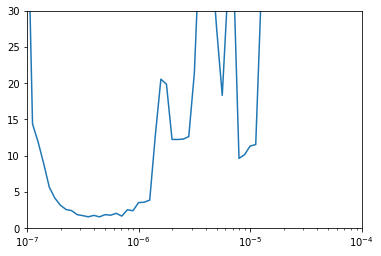

In [53]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-7, 1e-4, 0, 30])

In [54]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(x_train, window_size, batch_size=128)
valid_set = window_dataset(x_valid, window_size, batch_size=128)

model = keras.models.Sequential([
  keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  keras.layers.SimpleRNN(100, return_sequences=True),
  keras.layers.SimpleRNN(100),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200.0)
])
optimizer = keras.optimizers.SGD(lr=1.5e-6, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
early_stopping = keras.callbacks.EarlyStopping(patience=50)
model_checkpoint = keras.callbacks.ModelCheckpoint(
    "my_checkpoint", save_best_only=True)
model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping, model_checkpoint])

Epoch 1/500
7/7 [==============================] - 3s 156ms/step - loss: 51.5672 - mae: 52.0650 - val_loss: 10.2545 - val_mae: 10.7447
INFO:tensorflow:Assets written to: my_checkpoint\assets
Epoch 2/500
7/7 [==============================] - 0s 49ms/step - loss: 18.9682 - mae: 19.4646 - val_loss: 6.3211 - val_mae: 6.8075
INFO:tensorflow:Assets written to: my_checkpoint\assets
Epoch 3/500
7/7 [==============================] - 0s 49ms/step - loss: 9.8683 - mae: 10.3553 - val_loss: 13.2707 - val_mae: 13.7707
Epoch 4/500
7/7 [==============================] - 0s 49ms/step - loss: 7.2578 - mae: 7.7468 - val_loss: 3.1638 - val_mae: 3.6446
INFO:tensorflow:Assets written to: my_checkpoint\assets
Epoch 5/500
7/7 [==============================] - 0s 47ms/step - loss: 4.7135 - mae: 5.1905 - val_loss: 5.2716 - val_mae: 5.7661
Epoch 6/500
7/7 [==============================] - 0s 52ms/step - loss: 6.9869 - mae: 7.4787 - val_loss: 6.5902 - val_mae: 7.0899
Epoch 7/500
7/7 [=========================

Epoch 61/500
7/7 [==============================] - 0s 44ms/step - loss: 2.2703 - mae: 2.7412 - val_loss: 6.7426 - val_mae: 7.2426
Epoch 62/500
7/7 [==============================] - 0s 52ms/step - loss: 4.9100 - mae: 5.4092 - val_loss: 3.0085 - val_mae: 3.5049
Epoch 63/500
7/7 [==============================] - 0s 47ms/step - loss: 3.8304 - mae: 4.3267 - val_loss: 3.9308 - val_mae: 4.4293
Epoch 64/500
7/7 [==============================] - 0s 47ms/step - loss: 4.6028 - mae: 5.1003 - val_loss: 4.7532 - val_mae: 5.2529
Epoch 65/500
7/7 [==============================] - 0s 47ms/step - loss: 4.6774 - mae: 5.1771 - val_loss: 4.1098 - val_mae: 4.6098
Epoch 66/500
7/7 [==============================] - 0s 47ms/step - loss: 4.4643 - mae: 4.9635 - val_loss: 5.4746 - val_mae: 5.9746
Epoch 67/500
7/7 [==============================] - 0s 52ms/step - loss: 4.6577 - mae: 5.1577 - val_loss: 3.7641 - val_mae: 4.2616
Epoch 68/500
7/7 [==============================] - 0s 52ms/step - loss: 4.4748 - m

In [55]:
model = keras.models.load_model("my_checkpoint")

In [57]:
rnn_forecast = model_forecast(
    model,
    open_price[split_time - window_size:-1],
    window_size)[:, 0]

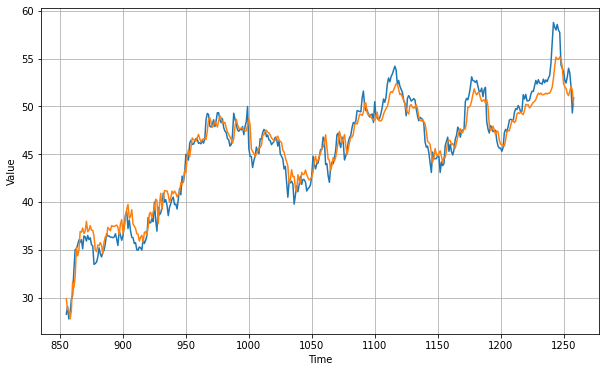

In [58]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [59]:
keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

1.0066838

Sequence to Sequence forecasting

In [60]:
def seq2seq_window_dataset(series, window_size, batch_size=32,
                           shuffle_buffer=1000):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [62]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = seq2seq_window_dataset(x_train, window_size,
                                   batch_size=128)

model = keras.models.Sequential([
  keras.layers.SimpleRNN(100, return_sequences=True,
                         input_shape=[None, 1]),
  keras.layers.SimpleRNN(100, return_sequences=True),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200)
])
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-7 * 10**(epoch / 30))
optimizer = keras.optimizers.SGD(lr=1e-7, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
7/7 [==============================] - 3s 42ms/step - loss: 56.1982 - mae: 56.6979
Epoch 2/100
7/7 [==============================] - 0s 36ms/step - loss: 19.1830 - mae: 19.6804
Epoch 3/100
7/7 [==============================] - 0s 42ms/step - loss: 23.0356 - mae: 23.5329
Epoch 4/100
7/7 [==============================] - 0s 42ms/step - loss: 15.5128 - mae: 16.0094
Epoch 5/100
7/7 [==============================] - 0s 31ms/step - loss: 11.1424 - mae: 11.6330
Epoch 6/100
7/7 [==============================] - 0s 29ms/step - loss: 9.8757 - mae: 10.3641
Epoch 7/100
7/7 [==============================] - 0s 31ms/step - loss: 8.3830 - mae: 8.8584
Epoch 8/100
7/7 [==============================] - 0s 29ms/step - loss: 8.1040 - mae: 8.5803
Epoch 9/100
7/7 [==============================] - 0s 31ms/step - loss: 7.5233 - mae: 7.9950
Epoch 10/100
7/7 [==============================] - 0s 29ms/step - loss: 7.0943 - mae: 7.5575
Epoch 11/100
7/7 [==============================] - 0s 31m

7/7 [==============================] - 0s 34ms/step - loss: 151.6868 - mae: 152.1868
Epoch 87/100
7/7 [==============================] - 0s 29ms/step - loss: 140.2805 - mae: 140.7805
Epoch 88/100
7/7 [==============================] - 0s 29ms/step - loss: 168.2124 - mae: 168.7124
Epoch 89/100
7/7 [==============================] - 0s 31ms/step - loss: 211.9986 - mae: 212.4986
Epoch 90/100
7/7 [==============================] - 0s 29ms/step - loss: 175.0392 - mae: 175.5392
Epoch 91/100
7/7 [==============================] - 0s 29ms/step - loss: 195.4444 - mae: 195.9430
Epoch 92/100
7/7 [==============================] - 0s 29ms/step - loss: 266.2253 - mae: 266.7253
Epoch 93/100
7/7 [==============================] - 0s 34ms/step - loss: 306.3949 - mae: 306.8949
Epoch 94/100
7/7 [==============================] - 0s 29ms/step - loss: 326.7668 - mae: 327.2668
Epoch 95/100
7/7 [==============================] - 0s 26ms/step - loss: 156.3628 - mae: 156.8613
Epoch 96/100
7/7 [===============

(1e-07, 0.0001, 0.0, 30.0)

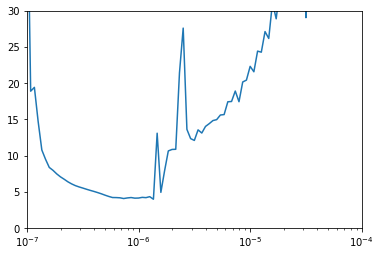

In [63]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-7, 1e-4, 0, 30])

In [65]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = seq2seq_window_dataset(x_train, window_size,
                                   batch_size=128)
valid_set = seq2seq_window_dataset(x_valid, window_size,
                                   batch_size=128)

model = keras.models.Sequential([
  keras.layers.SimpleRNN(100, return_sequences=True,
                         input_shape=[None, 1]),
  keras.layers.SimpleRNN(100, return_sequences=True),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200.0)
])
optimizer = keras.optimizers.SGD(lr=1e-6, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
early_stopping = keras.callbacks.EarlyStopping(patience=10)
model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping])

Epoch 1/500
7/7 [==============================] - 3s 128ms/step - loss: 48.3276 - mae: 48.8261 - val_loss: 18.3121 - val_mae: 18.8114
Epoch 2/500
7/7 [==============================] - 0s 63ms/step - loss: 21.4217 - mae: 21.9182 - val_loss: 17.8135 - val_mae: 18.3129
Epoch 3/500
7/7 [==============================] - 1s 81ms/step - loss: 18.1946 - mae: 18.6918 - val_loss: 10.4071 - val_mae: 10.9036
Epoch 4/500
7/7 [==============================] - 0s 60ms/step - loss: 14.4129 - mae: 14.9083 - val_loss: 6.5551 - val_mae: 7.0369
Epoch 5/500
7/7 [==============================] - 1s 70ms/step - loss: 10.4004 - mae: 10.8906 - val_loss: 6.9055 - val_mae: 7.3862
Epoch 6/500
7/7 [==============================] - 0s 55ms/step - loss: 8.5940 - mae: 9.0790 - val_loss: 5.1010 - val_mae: 5.5834
Epoch 7/500
7/7 [==============================] - 0s 55ms/step - loss: 6.4393 - mae: 6.9191 - val_loss: 7.2230 - val_mae: 7.7115
Epoch 8/500
7/7 [==============================] - 0s 52ms/step - loss: 5

In [70]:
rnn_forecast = model_forecast(model, open_price[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

<ipython-input-70-671344d0fd8f>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  rnn_forecast = model_forecast(model, open_price[..., np.newaxis], window_size)


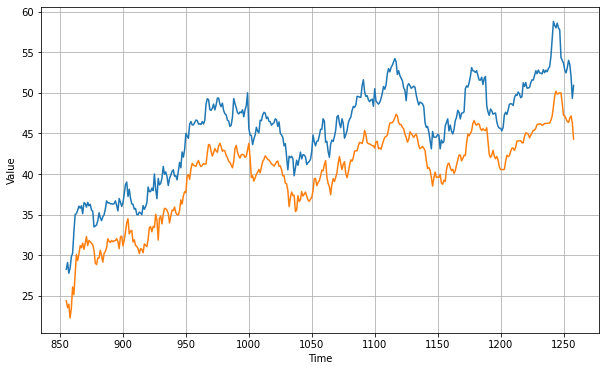

In [67]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [68]:
keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

5.379255

LSTM model

In [72]:
def sequential_window_dataset(series, window_size):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=window_size, drop_remainder=True)
    ds = ds.flat_map(lambda window: window.batch(window_size + 1))
    ds = ds.map(lambda window: (window[:-1], window[1:]))
    return ds.batch(1).prefetch(1)

In [74]:
class ResetStatesCallback(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs):
        self.model.reset_states()

In [75]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = sequential_window_dataset(x_train, window_size)

model = keras.models.Sequential([
  keras.layers.LSTM(100, return_sequences=True, stateful=True,
                    batch_input_shape=[1, None, 1]),
  keras.layers.LSTM(100, return_sequences=True, stateful=True),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200.0)
])
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
reset_states = ResetStatesCallback()
optimizer = keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100,
                    callbacks=[lr_schedule, reset_states])

Epoch 1/100
28/28 [==============================] - 5s 19ms/step - loss: 77.9170 - mae: 78.4170
Epoch 2/100
28/28 [==============================] - 0s 17ms/step - loss: 72.8695 - mae: 73.3695
Epoch 3/100
28/28 [==============================] - 0s 13ms/step - loss: 66.2670 - mae: 66.7670
Epoch 4/100
28/28 [==============================] - 0s 16ms/step - loss: 58.8469 - mae: 59.3469
Epoch 5/100
28/28 [==============================] - 1s 19ms/step - loss: 50.5924 - mae: 51.0924
Epoch 6/100
28/28 [==============================] - 0s 14ms/step - loss: 41.4187 - mae: 41.9187
Epoch 7/100
28/28 [==============================] - 0s 14ms/step - loss: 31.1988 - mae: 31.6988
Epoch 8/100
28/28 [==============================] - 0s 13ms/step - loss: 19.7408 - mae: 20.2408
Epoch 9/100
28/28 [==============================] - 0s 13ms/step - loss: 7.2857 - mae: 7.7838
Epoch 10/100
28/28 [==============================] - 0s 13ms/step - loss: 5.9124 - mae: 6.3966
Epoch 11/100
28/28 [=============

28/28 [==============================] - 0s 14ms/step - loss: 12.4072 - mae: 12.8993
Epoch 86/100
28/28 [==============================] - 0s 13ms/step - loss: 13.2542 - mae: 13.7467
Epoch 87/100
28/28 [==============================] - 0s 13ms/step - loss: 13.1782 - mae: 13.6712
Epoch 88/100
28/28 [==============================] - 0s 13ms/step - loss: 15.1465 - mae: 15.6426
Epoch 89/100
28/28 [==============================] - 0s 13ms/step - loss: 8.4802 - mae: 8.9754
Epoch 90/100
28/28 [==============================] - 0s 13ms/step - loss: 15.5554 - mae: 16.0486
Epoch 91/100
28/28 [==============================] - 0s 13ms/step - loss: 15.4648 - mae: 15.9632
Epoch 92/100
28/28 [==============================] - 0s 13ms/step - loss: 19.9070 - mae: 20.4063
Epoch 93/100
28/28 [==============================] - 0s 13ms/step - loss: 13.4559 - mae: 13.9399
Epoch 94/100
28/28 [==============================] - 0s 12ms/step - loss: 33.7958 - mae: 34.2958
Epoch 95/100
28/28 [===============

(1e-08, 0.0001, 0.0, 30.0)

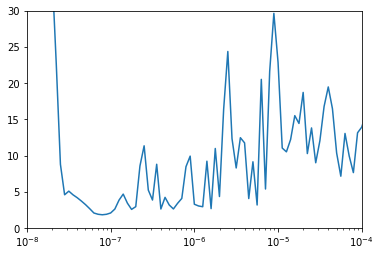

In [76]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 30])

In [77]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = sequential_window_dataset(x_train, window_size)
valid_set = sequential_window_dataset(x_valid, window_size)

model = keras.models.Sequential([
  keras.layers.LSTM(100, return_sequences=True, stateful=True,
                         batch_input_shape=[1, None, 1]),
  keras.layers.LSTM(100, return_sequences=True, stateful=True),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200.0)
])
optimizer = keras.optimizers.SGD(lr=8e-8, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
reset_states = ResetStatesCallback()
model_checkpoint = keras.callbacks.ModelCheckpoint(
    "my_checkpoint.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=50)
model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping, model_checkpoint, reset_states])

Epoch 1/500
28/28 [==============================] - 5s 54ms/step - loss: 73.1040 - mae: 73.6040 - val_loss: 63.0534 - val_mae: 63.5534
Epoch 2/500
28/28 [==============================] - 0s 17ms/step - loss: 34.0479 - mae: 34.5479 - val_loss: 13.2852 - val_mae: 13.7848
Epoch 3/500
28/28 [==============================] - 1s 19ms/step - loss: 4.7697 - mae: 5.2566 - val_loss: 3.2171 - val_mae: 3.6813
Epoch 4/500
28/28 [==============================] - 0s 17ms/step - loss: 7.6678 - mae: 8.1605 - val_loss: 2.6454 - val_mae: 3.1034
Epoch 5/500
28/28 [==============================] - 1s 18ms/step - loss: 6.2959 - mae: 6.7859 - val_loss: 2.1392 - val_mae: 2.6012
Epoch 6/500
28/28 [==============================] - 0s 17ms/step - loss: 3.4269 - mae: 3.9123 - val_loss: 1.9046 - val_mae: 2.3626
Epoch 7/500
28/28 [==============================] - 0s 16ms/step - loss: 1.8592 - mae: 2.2881 - val_loss: 1.7604 - val_mae: 2.2238
Epoch 8/500
28/28 [==============================] - 0s 16ms/step - 

28/28 [==============================] - 1s 18ms/step - loss: 1.2867 - mae: 1.7000 - val_loss: 1.4684 - val_mae: 1.9112
Epoch 63/500
28/28 [==============================] - 1s 19ms/step - loss: 1.2835 - mae: 1.6963 - val_loss: 1.4647 - val_mae: 1.9073
Epoch 64/500
28/28 [==============================] - 0s 17ms/step - loss: 1.2804 - mae: 1.6928 - val_loss: 1.4610 - val_mae: 1.9033
Epoch 65/500
28/28 [==============================] - 1s 18ms/step - loss: 1.2773 - mae: 1.6892 - val_loss: 1.4574 - val_mae: 1.8993
Epoch 66/500
28/28 [==============================] - 0s 17ms/step - loss: 1.2740 - mae: 1.6856 - val_loss: 1.4536 - val_mae: 1.8951
Epoch 67/500
28/28 [==============================] - 0s 17ms/step - loss: 1.2707 - mae: 1.6819 - val_loss: 1.4499 - val_mae: 1.8909
Epoch 68/500
28/28 [==============================] - 0s 16ms/step - loss: 1.2672 - mae: 1.6782 - val_loss: 1.4461 - val_mae: 1.8868
Epoch 69/500
28/28 [==============================] - 1s 19ms/step - loss: 1.2636 

28/28 [==============================] - 0s 17ms/step - loss: 1.0944 - mae: 1.5029 - val_loss: 1.2819 - val_mae: 1.7179
Epoch 124/500
28/28 [==============================] - 1s 18ms/step - loss: 1.0792 - mae: 1.4886 - val_loss: 1.2663 - val_mae: 1.7021
Epoch 125/500
28/28 [==============================] - 0s 17ms/step - loss: 1.0634 - mae: 1.4737 - val_loss: 1.2512 - val_mae: 1.6874
Epoch 126/500
28/28 [==============================] - 1s 18ms/step - loss: 1.0480 - mae: 1.4588 - val_loss: 1.2401 - val_mae: 1.6770
Epoch 127/500
28/28 [==============================] - 0s 17ms/step - loss: 1.0348 - mae: 1.4449 - val_loss: 1.2407 - val_mae: 1.6787
Epoch 128/500
28/28 [==============================] - 0s 17ms/step - loss: 1.0291 - mae: 1.4359 - val_loss: 1.2640 - val_mae: 1.7065
Epoch 129/500
28/28 [==============================] - 0s 17ms/step - loss: 1.0418 - mae: 1.4426 - val_loss: 1.3156 - val_mae: 1.7585
Epoch 130/500
28/28 [==============================] - 0s 17ms/step - loss: 

28/28 [==============================] - 0s 16ms/step - loss: 0.8532 - mae: 1.2412 - val_loss: 1.1507 - val_mae: 1.5827
Epoch 185/500
28/28 [==============================] - 0s 16ms/step - loss: 0.8376 - mae: 1.2125 - val_loss: 1.2192 - val_mae: 1.6564
Epoch 186/500
28/28 [==============================] - 0s 16ms/step - loss: 0.8303 - mae: 1.1988 - val_loss: 1.0989 - val_mae: 1.5337
Epoch 187/500
28/28 [==============================] - 0s 16ms/step - loss: 0.8393 - mae: 1.2039 - val_loss: 0.8619 - val_mae: 1.2829
Epoch 188/500
28/28 [==============================] - 0s 16ms/step - loss: 0.8446 - mae: 1.2393 - val_loss: 0.7924 - val_mae: 1.2058
Epoch 189/500
28/28 [==============================] - 0s 16ms/step - loss: 0.7955 - mae: 1.1822 - val_loss: 0.9437 - val_mae: 1.3717
Epoch 190/500
28/28 [==============================] - 0s 16ms/step - loss: 0.7114 - mae: 1.0761 - val_loss: 1.2390 - val_mae: 1.6868
Epoch 191/500
28/28 [==============================] - 0s 16ms/step - loss: 

28/28 [==============================] - 0s 16ms/step - loss: 1.7807 - mae: 2.2346 - val_loss: 1.0585 - val_mae: 1.4895
Epoch 246/500
28/28 [==============================] - 0s 16ms/step - loss: 0.9202 - mae: 1.3272 - val_loss: 1.1982 - val_mae: 1.6439
Epoch 247/500
28/28 [==============================] - 0s 16ms/step - loss: 0.8721 - mae: 1.2674 - val_loss: 1.4569 - val_mae: 1.9104
Epoch 248/500
28/28 [==============================] - 0s 16ms/step - loss: 1.3518 - mae: 1.7877 - val_loss: 1.4027 - val_mae: 1.8534
Epoch 249/500
28/28 [==============================] - 0s 16ms/step - loss: 2.0580 - mae: 2.5213 - val_loss: 2.0123 - val_mae: 2.4584
Epoch 250/500
28/28 [==============================] - 0s 16ms/step - loss: 2.5187 - mae: 2.9995 - val_loss: 3.2050 - val_mae: 3.6975
Epoch 251/500
28/28 [==============================] - 0s 16ms/step - loss: 1.6777 - mae: 2.1372 - val_loss: 2.3182 - val_mae: 2.7997
Epoch 252/500
28/28 [==============================] - 0s 16ms/step - loss: 

In [78]:
model = keras.models.load_model("my_checkpoint.h5")

In [80]:
rnn_forecast = model.predict(open_price[np.newaxis, :, np.newaxis])
rnn_forecast = rnn_forecast[0, split_time - 1:-1, 0]

<ipython-input-80-a10544ea3816>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  rnn_forecast = model.predict(open_price[np.newaxis, :, np.newaxis])


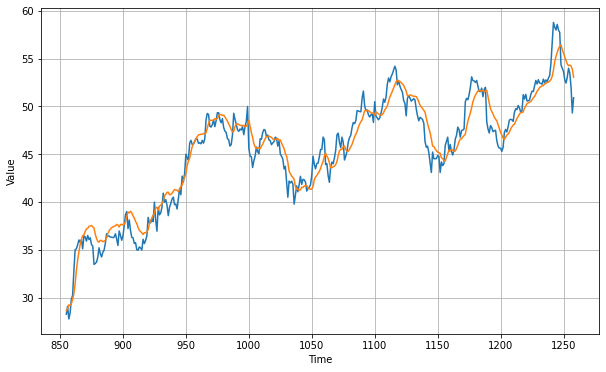

In [81]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [82]:
keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

1.1796373

1D-Convolutional Layers

In [83]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = seq2seq_window_dataset(x_train, window_size,
                                   batch_size=128)

model = keras.models.Sequential([
  keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  keras.layers.LSTM(32, return_sequences=True),
  keras.layers.LSTM(32, return_sequences=True),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200)
])
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
7/7 [==============================] - 6s 34ms/step - loss: 83.8780 - mae: 84.3780
Epoch 2/100
7/7 [==============================] - 0s 31ms/step - loss: 82.9937 - mae: 83.4937
Epoch 3/100
7/7 [==============================] - 0s 31ms/step - loss: 82.4018 - mae: 82.9018
Epoch 4/100
7/7 [==============================] - 0s 29ms/step - loss: 80.9810 - mae: 81.4810
Epoch 5/100
7/7 [==============================] - 0s 29ms/step - loss: 79.6089 - mae: 80.1089
Epoch 6/100
7/7 [==============================] - 0s 29ms/step - loss: 77.9240 - mae: 78.4240
Epoch 7/100
7/7 [==============================] - 0s 31ms/step - loss: 75.4348 - mae: 75.9348
Epoch 8/100
7/7 [==============================] - 0s 31ms/step - loss: 73.2046 - mae: 73.7046
Epoch 9/100
7/7 [==============================] - 0s 31ms/step - loss: 70.5841 - mae: 71.0840
Epoch 10/100
7/7 [==============================] - 0s 31ms/step - loss: 67.7001 - mae: 68.2001
Epoch 11/100
7/7 [==============================]

7/7 [==============================] - 0s 31ms/step - loss: 22.1806 - mae: 22.6750
Epoch 88/100
7/7 [==============================] - 0s 31ms/step - loss: 14.0785 - mae: 14.5685
Epoch 89/100
7/7 [==============================] - 0s 31ms/step - loss: 9.1000 - mae: 9.5913
Epoch 90/100
7/7 [==============================] - 0s 29ms/step - loss: 10.4648 - mae: 10.9561
Epoch 91/100
7/7 [==============================] - 0s 34ms/step - loss: 10.8919 - mae: 11.3819
Epoch 92/100
7/7 [==============================] - 0s 31ms/step - loss: 6.7199 - mae: 7.2042
Epoch 93/100
7/7 [==============================] - 0s 31ms/step - loss: 13.5505 - mae: 14.0480
Epoch 94/100
7/7 [==============================] - 0s 34ms/step - loss: 8.4092 - mae: 8.8994
Epoch 95/100
7/7 [==============================] - 0s 34ms/step - loss: 14.8183 - mae: 15.3137
Epoch 96/100
7/7 [==============================] - 0s 31ms/step - loss: 12.9839 - mae: 13.4779
Epoch 97/100
7/7 [==============================] - 0s 34ms

(1e-08, 0.0001, 0.0, 30.0)

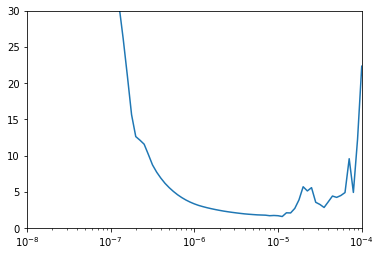

In [84]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 30])

In [85]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = seq2seq_window_dataset(x_train, window_size,
                                   batch_size=128)
valid_set = seq2seq_window_dataset(x_valid, window_size,
                                   batch_size=128)

model = keras.models.Sequential([
  keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  keras.layers.LSTM(32, return_sequences=True),
  keras.layers.LSTM(32, return_sequences=True),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200)
])
optimizer = keras.optimizers.SGD(lr=8e-6, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

model_checkpoint = keras.callbacks.ModelCheckpoint(
    "my_checkpoint.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=50)
model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping, model_checkpoint])

Epoch 1/500
7/7 [==============================] - 8s 242ms/step - loss: 66.5207 - mae: 67.0202 - val_loss: 44.5854 - val_mae: 45.0849
Epoch 2/500
7/7 [==============================] - 0s 52ms/step - loss: 34.9470 - mae: 35.4444 - val_loss: 42.3614 - val_mae: 42.8614
Epoch 3/500
7/7 [==============================] - 0s 57ms/step - loss: 25.8061 - mae: 26.3037 - val_loss: 8.5649 - val_mae: 9.0496
Epoch 4/500
7/7 [==============================] - 0s 63ms/step - loss: 16.0796 - mae: 16.5736 - val_loss: 18.2084 - val_mae: 18.7062
Epoch 5/500
7/7 [==============================] - 0s 55ms/step - loss: 12.4748 - mae: 12.9698 - val_loss: 6.6192 - val_mae: 7.1067
Epoch 6/500
7/7 [==============================] - 0s 55ms/step - loss: 8.9023 - mae: 9.3899 - val_loss: 13.4732 - val_mae: 13.9715
Epoch 7/500
7/7 [==============================] - 0s 52ms/step - loss: 7.1431 - mae: 7.6294 - val_loss: 5.3040 - val_mae: 5.7835
Epoch 8/500
7/7 [==============================] - 0s 52ms/step - loss:

7/7 [==============================] - 0s 49ms/step - loss: 0.7870 - mae: 1.1942 - val_loss: 0.6070 - val_mae: 0.9837
Epoch 64/500
7/7 [==============================] - 0s 49ms/step - loss: 0.6500 - mae: 1.0268 - val_loss: 0.7394 - val_mae: 1.1446
Epoch 65/500
7/7 [==============================] - 0s 49ms/step - loss: 0.8217 - mae: 1.2355 - val_loss: 0.7021 - val_mae: 1.0990
Epoch 66/500
7/7 [==============================] - 0s 49ms/step - loss: 0.6973 - mae: 1.0869 - val_loss: 0.6629 - val_mae: 1.0527
Epoch 67/500
7/7 [==============================] - 0s 47ms/step - loss: 0.7683 - mae: 1.1729 - val_loss: 0.5834 - val_mae: 0.9575
Epoch 68/500
7/7 [==============================] - 0s 49ms/step - loss: 0.7114 - mae: 1.1017 - val_loss: 0.6297 - val_mae: 1.0123
Epoch 69/500
7/7 [==============================] - 0s 55ms/step - loss: 0.7363 - mae: 1.1329 - val_loss: 0.6427 - val_mae: 1.0281
Epoch 70/500
7/7 [==============================] - 0s 57ms/step - loss: 0.6602 - mae: 1.0452 - 

7/7 [==============================] - 0s 49ms/step - loss: 0.6086 - mae: 0.9986 - val_loss: 0.4791 - val_mae: 0.8438
Epoch 126/500
7/7 [==============================] - 0s 47ms/step - loss: 0.5042 - mae: 0.8660 - val_loss: 0.4928 - val_mae: 0.8620
Epoch 127/500
7/7 [==============================] - 0s 52ms/step - loss: 0.6264 - mae: 1.0216 - val_loss: 0.5311 - val_mae: 0.9102
Epoch 128/500
7/7 [==============================] - 0s 49ms/step - loss: 0.5113 - mae: 0.8776 - val_loss: 0.6835 - val_mae: 1.0967
Epoch 129/500
7/7 [==============================] - 0s 49ms/step - loss: 0.7088 - mae: 1.1210 - val_loss: 0.8715 - val_mae: 1.3074
Epoch 130/500
7/7 [==============================] - 0s 55ms/step - loss: 0.5894 - mae: 0.9782 - val_loss: 0.6289 - val_mae: 1.0258
Epoch 131/500
7/7 [==============================] - 0s 49ms/step - loss: 0.5614 - mae: 0.9436 - val_loss: 0.6200 - val_mae: 1.0168
Epoch 132/500
7/7 [==============================] - 0s 52ms/step - loss: 0.5861 - mae: 0.

7/7 [==============================] - 0s 49ms/step - loss: 0.5080 - mae: 0.8836 - val_loss: 0.4538 - val_mae: 0.8199
Epoch 188/500
7/7 [==============================] - 0s 49ms/step - loss: 0.5328 - mae: 0.9163 - val_loss: 0.4625 - val_mae: 0.8311
Epoch 189/500
7/7 [==============================] - 0s 47ms/step - loss: 0.6092 - mae: 1.0037 - val_loss: 0.5928 - val_mae: 0.9937
Epoch 190/500
7/7 [==============================] - 0s 49ms/step - loss: 0.5896 - mae: 0.9856 - val_loss: 0.4409 - val_mae: 0.8027
Epoch 191/500
7/7 [==============================] - 0s 49ms/step - loss: 0.5276 - mae: 0.9099 - val_loss: 0.4821 - val_mae: 0.8538
Epoch 192/500
7/7 [==============================] - 0s 49ms/step - loss: 0.4402 - mae: 0.7965 - val_loss: 0.8521 - val_mae: 1.2900
Epoch 193/500
7/7 [==============================] - 0s 49ms/step - loss: 0.6140 - mae: 1.0150 - val_loss: 0.5989 - val_mae: 1.0016
Epoch 194/500
7/7 [==============================] - 0s 49ms/step - loss: 0.6151 - mae: 1.

7/7 [==============================] - 0s 47ms/step - loss: 0.4846 - mae: 0.8589 - val_loss: 0.4067 - val_mae: 0.7620
Epoch 250/500
7/7 [==============================] - 0s 47ms/step - loss: 0.4456 - mae: 0.8065 - val_loss: 0.6623 - val_mae: 1.0753
Epoch 251/500
7/7 [==============================] - 0s 47ms/step - loss: 0.4629 - mae: 0.8298 - val_loss: 0.6724 - val_mae: 1.0871
Epoch 252/500
7/7 [==============================] - 0s 47ms/step - loss: 0.4515 - mae: 0.8154 - val_loss: 0.7822 - val_mae: 1.2140
Epoch 253/500
7/7 [==============================] - 0s 47ms/step - loss: 0.5698 - mae: 0.9629 - val_loss: 0.4406 - val_mae: 0.8036
Epoch 254/500
7/7 [==============================] - 0s 47ms/step - loss: 0.4050 - mae: 0.7553 - val_loss: 0.5040 - val_mae: 0.8895
Epoch 255/500
7/7 [==============================] - 0s 47ms/step - loss: 0.5448 - mae: 0.9315 - val_loss: 0.5427 - val_mae: 0.9372
Epoch 256/500
7/7 [==============================] - 0s 47ms/step - loss: 0.5582 - mae: 0.

7/7 [==============================] - 0s 49ms/step - loss: 0.3807 - mae: 0.7258 - val_loss: 0.3935 - val_mae: 0.7460
Epoch 312/500
7/7 [==============================] - 0s 49ms/step - loss: 0.4936 - mae: 0.8692 - val_loss: 0.5619 - val_mae: 0.9587
Epoch 313/500
7/7 [==============================] - 0s 47ms/step - loss: 0.4782 - mae: 0.8528 - val_loss: 0.4125 - val_mae: 0.7720
Epoch 314/500
7/7 [==============================] - 0s 49ms/step - loss: 0.4543 - mae: 0.8186 - val_loss: 0.4028 - val_mae: 0.7569
Epoch 315/500
7/7 [==============================] - 0s 49ms/step - loss: 0.4786 - mae: 0.8467 - val_loss: 0.6554 - val_mae: 1.0691
Epoch 316/500
7/7 [==============================] - 0s 49ms/step - loss: 0.5482 - mae: 0.9372 - val_loss: 1.0497 - val_mae: 1.5092
Epoch 317/500
7/7 [==============================] - 0s 49ms/step - loss: 0.6199 - mae: 1.0194 - val_loss: 0.6100 - val_mae: 1.0152
Epoch 318/500
7/7 [==============================] - 0s 49ms/step - loss: 0.4661 - mae: 0.

7/7 [==============================] - 0s 49ms/step - loss: 0.4333 - mae: 0.7967 - val_loss: 0.7208 - val_mae: 1.1462
Epoch 374/500
7/7 [==============================] - 0s 47ms/step - loss: 0.4672 - mae: 0.8363 - val_loss: 0.5162 - val_mae: 0.9050
Epoch 375/500
7/7 [==============================] - 0s 47ms/step - loss: 0.5186 - mae: 0.9011 - val_loss: 0.4932 - val_mae: 0.8767
Epoch 376/500
7/7 [==============================] - 0s 47ms/step - loss: 0.5028 - mae: 0.8803 - val_loss: 0.8255 - val_mae: 1.2637
Epoch 377/500
7/7 [==============================] - 0s 49ms/step - loss: 0.5965 - mae: 0.9910 - val_loss: 1.0370 - val_mae: 1.4974
Epoch 378/500
7/7 [==============================] - 0s 49ms/step - loss: 0.5780 - mae: 0.9688 - val_loss: 0.6802 - val_mae: 1.0980
Epoch 379/500
7/7 [==============================] - 0s 49ms/step - loss: 0.4411 - mae: 0.8020 - val_loss: 0.4071 - val_mae: 0.7680
Epoch 380/500
7/7 [==============================] - 0s 49ms/step - loss: 0.3716 - mae: 0.

Epoch 435/500
7/7 [==============================] - 0s 47ms/step - loss: 0.3903 - mae: 0.7399 - val_loss: 0.7809 - val_mae: 1.2142
Epoch 436/500
7/7 [==============================] - 0s 47ms/step - loss: 0.4776 - mae: 0.8518 - val_loss: 0.5302 - val_mae: 0.9242
Epoch 437/500
7/7 [==============================] - 0s 47ms/step - loss: 0.4989 - mae: 0.8780 - val_loss: 0.6486 - val_mae: 1.0674
Epoch 438/500
7/7 [==============================] - 0s 47ms/step - loss: 0.5333 - mae: 0.9176 - val_loss: 0.3692 - val_mae: 0.7180
Epoch 439/500
7/7 [==============================] - 0s 47ms/step - loss: 0.3866 - mae: 0.7370 - val_loss: 0.4345 - val_mae: 0.8050
Epoch 440/500
7/7 [==============================] - 0s 47ms/step - loss: 0.3986 - mae: 0.7533 - val_loss: 0.3846 - val_mae: 0.7357
Epoch 441/500
7/7 [==============================] - 0s 49ms/step - loss: 0.3841 - mae: 0.7354 - val_loss: 0.4563 - val_mae: 0.8325
Epoch 442/500
7/7 [==============================] - 0s 49ms/step - loss: 0.

7/7 [==============================] - 0s 55ms/step - loss: 0.4247 - mae: 0.7868 - val_loss: 0.4141 - val_mae: 0.7792
Epoch 498/500
7/7 [==============================] - 0s 55ms/step - loss: 0.4314 - mae: 0.7934 - val_loss: 0.4312 - val_mae: 0.8019
Epoch 499/500
7/7 [==============================] - 0s 55ms/step - loss: 0.4406 - mae: 0.8034 - val_loss: 0.3642 - val_mae: 0.7140
Epoch 500/500
7/7 [==============================] - 0s 57ms/step - loss: 0.4562 - mae: 0.8261 - val_loss: 0.3722 - val_mae: 0.7260


In [86]:
model = keras.models.load_model("my_checkpoint.h5")

In [87]:
rnn_forecast = model_forecast(model, open_price[:,  np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

<ipython-input-87-c82dd839fc5c>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  rnn_forecast = model_forecast(model, open_price[:,  np.newaxis], window_size)


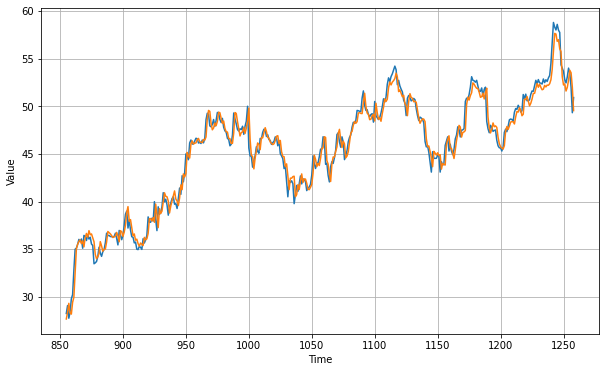

In [88]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [89]:
keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

0.7256249

Fully Convolutional Forecasting

In [90]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 64
train_set = seq2seq_window_dataset(x_train, window_size,
                                   batch_size=128)

model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[None, 1]))
for dilation_rate in (1, 2, 4, 8, 16, 32):
    model.add(
      keras.layers.Conv1D(filters=32,
                          kernel_size=2,
                          strides=1,
                          dilation_rate=dilation_rate,
                          padding="causal",
                          activation="relu")
    )
model.add(keras.layers.Conv1D(filters=1, kernel_size=1))
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch / 30))
optimizer = keras.optimizers.Adam(lr=1e-4)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
7/7 [==============================] - 3s 60ms/step - loss: 35.8506 - mae: 36.3506
Epoch 2/100
7/7 [==============================] - 1s 68ms/step - loss: 35.8437 - mae: 36.3437
Epoch 3/100
7/7 [==============================] - 0s 55ms/step - loss: 34.9503 - mae: 35.4503
Epoch 4/100
7/7 [==============================] - 0s 55ms/step - loss: 34.9741 - mae: 35.4741
Epoch 5/100
7/7 [==============================] - 1s 55ms/step - loss: 34.7274 - mae: 35.2274
Epoch 6/100
7/7 [==============================] - 1s 60ms/step - loss: 33.6907 - mae: 34.1907
Epoch 7/100
7/7 [==============================] - 1s 57ms/step - loss: 33.3578 - mae: 33.8578
Epoch 8/100
7/7 [==============================] - 1s 68ms/step - loss: 32.4565 - mae: 32.9565
Epoch 9/100
7/7 [==============================] - 1s 55ms/step - loss: 31.1550 - mae: 31.6550
Epoch 10/100
7/7 [==============================] - 0s 57ms/step - loss: 29.2092 - mae: 29.7092
Epoch 11/100
7/7 [==============================]

7/7 [==============================] - 0s 49ms/step - loss: 5.9314 - mae: 6.4151
Epoch 88/100
7/7 [==============================] - 0s 52ms/step - loss: 4.3536 - mae: 4.8329
Epoch 89/100
7/7 [==============================] - 0s 49ms/step - loss: 10.0511 - mae: 10.5424
Epoch 90/100
7/7 [==============================] - 0s 52ms/step - loss: 4.8524 - mae: 5.3335
Epoch 91/100
7/7 [==============================] - 0s 52ms/step - loss: 5.2016 - mae: 5.6820
Epoch 92/100
7/7 [==============================] - 0s 52ms/step - loss: 5.7264 - mae: 6.2035
Epoch 93/100
7/7 [==============================] - 0s 49ms/step - loss: 8.2499 - mae: 8.7300
Epoch 94/100
7/7 [==============================] - 0s 49ms/step - loss: 24.9180 - mae: 25.4180
Epoch 95/100
7/7 [==============================] - 0s 49ms/step - loss: 49.4915 - mae: 49.9908
Epoch 96/100
7/7 [==============================] - 0s 47ms/step - loss: 28.1290 - mae: 28.6289
Epoch 97/100
7/7 [==============================] - 0s 49ms/step 

(0.0001, 0.1, 0.0, 30.0)

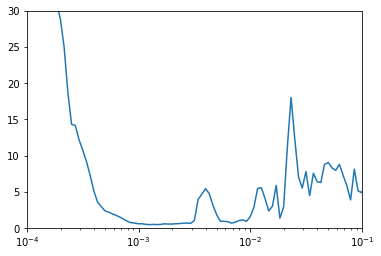

In [91]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-4, 1e-1, 0, 30])

In [92]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 64
train_set = seq2seq_window_dataset(x_train, window_size,
                                   batch_size=128)
valid_set = seq2seq_window_dataset(x_valid, window_size,
                                   batch_size=128)

model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[None, 1]))
for dilation_rate in (1, 2, 4, 8, 16, 32):
    model.add(
      keras.layers.Conv1D(filters=32,
                          kernel_size=2,
                          strides=1,
                          dilation_rate=dilation_rate,
                          padding="causal",
                          activation="relu")
    )
model.add(keras.layers.Conv1D(filters=1, kernel_size=1))
optimizer = keras.optimizers.Adam(lr=1e-3)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

model_checkpoint = keras.callbacks.ModelCheckpoint(
    "my_checkpoint.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=50)
history = model.fit(train_set, epochs=500,
                    validation_data=valid_set,
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/500
7/7 [==============================] - 4s 208ms/step - loss: 33.6056 - mae: 34.1056 - val_loss: 36.5974 - val_mae: 37.0973
Epoch 2/500
7/7 [==============================] - 1s 83ms/step - loss: 26.4938 - mae: 26.9937 - val_loss: 19.6539 - val_mae: 20.1456
Epoch 3/500
7/7 [==============================] - 1s 86ms/step - loss: 14.7788 - mae: 15.2707 - val_loss: 19.2177 - val_mae: 19.7142
Epoch 4/500
7/7 [==============================] - 1s 99ms/step - loss: 14.5898 - mae: 15.0838 - val_loss: 14.0098 - val_mae: 14.5035
Epoch 5/500
7/7 [==============================] - 1s 89ms/step - loss: 10.9358 - mae: 11.4241 - val_loss: 11.2812 - val_mae: 11.7677
Epoch 6/500
7/7 [==============================] - 1s 107ms/step - loss: 8.1917 - mae: 8.6752 - val_loss: 7.1118 - val_mae: 7.5945
Epoch 7/500
7/7 [==============================] - 1s 78ms/step - loss: 4.9485 - mae: 5.4145 - val_loss: 4.0241 - val_mae: 4.4876
Epoch 8/500
7/7 [==============================] - 1s 78ms/step - lo

7/7 [==============================] - 1s 76ms/step - loss: 0.3673 - mae: 0.7094 - val_loss: 0.3883 - val_mae: 0.7467
Epoch 64/500
7/7 [==============================] - 1s 73ms/step - loss: 0.3598 - mae: 0.6991 - val_loss: 0.3258 - val_mae: 0.6625
Epoch 65/500
7/7 [==============================] - 1s 76ms/step - loss: 0.3400 - mae: 0.6754 - val_loss: 0.4373 - val_mae: 0.8082
Epoch 66/500
7/7 [==============================] - 1s 76ms/step - loss: 0.3735 - mae: 0.7159 - val_loss: 0.3825 - val_mae: 0.7349
Epoch 67/500
7/7 [==============================] - 1s 76ms/step - loss: 0.3526 - mae: 0.6893 - val_loss: 0.3445 - val_mae: 0.6902
Epoch 68/500
7/7 [==============================] - 1s 76ms/step - loss: 0.3541 - mae: 0.6919 - val_loss: 0.3396 - val_mae: 0.6835
Epoch 69/500
7/7 [==============================] - 1s 76ms/step - loss: 0.3444 - mae: 0.6807 - val_loss: 0.3791 - val_mae: 0.7304
Epoch 70/500
7/7 [==============================] - 1s 76ms/step - loss: 0.3507 - mae: 0.6872 - 

7/7 [==============================] - 1s 78ms/step - loss: 0.3428 - mae: 0.6783 - val_loss: 0.3264 - val_mae: 0.6602
Epoch 126/500
7/7 [==============================] - 1s 76ms/step - loss: 0.3412 - mae: 0.6758 - val_loss: 0.3280 - val_mae: 0.6622
Epoch 127/500
7/7 [==============================] - 1s 76ms/step - loss: 0.3281 - mae: 0.6595 - val_loss: 0.3305 - val_mae: 0.6654
Epoch 128/500
7/7 [==============================] - 1s 76ms/step - loss: 0.3339 - mae: 0.6670 - val_loss: 0.3255 - val_mae: 0.6594
Epoch 129/500
7/7 [==============================] - 1s 76ms/step - loss: 0.3383 - mae: 0.6732 - val_loss: 0.3220 - val_mae: 0.6563
Epoch 130/500
7/7 [==============================] - 1s 76ms/step - loss: 0.3381 - mae: 0.6729 - val_loss: 0.3313 - val_mae: 0.6665
Epoch 131/500
7/7 [==============================] - 1s 78ms/step - loss: 0.3376 - mae: 0.6716 - val_loss: 0.4040 - val_mae: 0.7672
Epoch 132/500
7/7 [==============================] - 1s 76ms/step - loss: 0.3940 - mae: 0.

In [93]:
model = keras.models.load_model("my_checkpoint.h5")

In [95]:
cnn_forecast = model_forecast(model, open_price[..., np.newaxis], window_size)
cnn_forecast = cnn_forecast[split_time - window_size:-1, -1, 0]

<ipython-input-95-d7ff6ae36191>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cnn_forecast = model_forecast(model, open_price[..., np.newaxis], window_size)


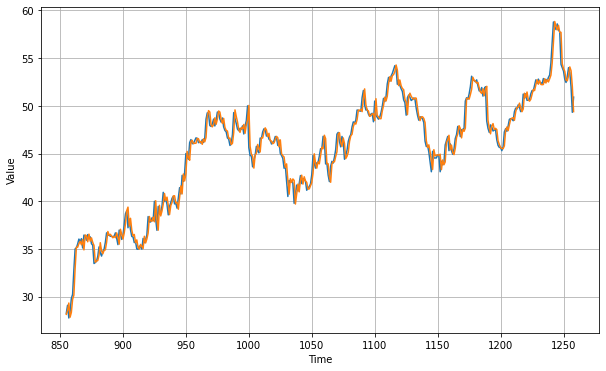

In [96]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, cnn_forecast)

In [97]:
keras.metrics.mean_absolute_error(x_valid, cnn_forecast).numpy()

0.6678054